In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Importing Data**

In [63]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Data Preprocessing**

In [64]:
data.shape

(10000, 14)

In [65]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

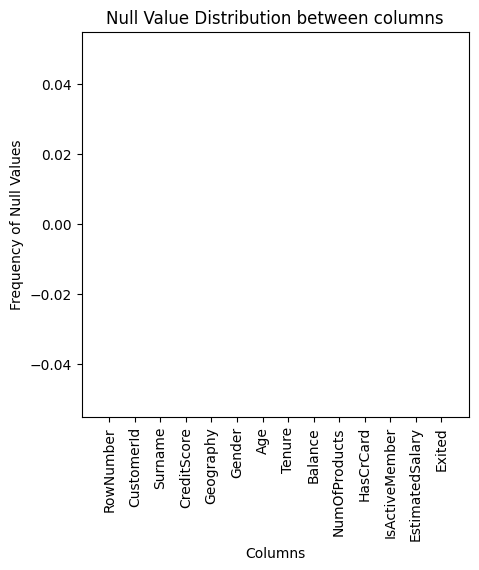

In [66]:
plt.figure(figsize=(5,5))
plt.bar(data.columns,data.columns.isna().sum())
plt.xlabel("Columns")
plt.ylabel("Frequency of Null Values")
plt.xticks(rotation=90)
plt.title('Null Value Distribution between columns');

From the above plot it is clear that there are no Null values in the dataset

**Dropping unique columns**

In [67]:
df = data.drop(['RowNumber','CustomerId','Surname','RowNumber'],axis=1)

**Label Encoding the Categorical Features**

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

# **EDA**

In [69]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


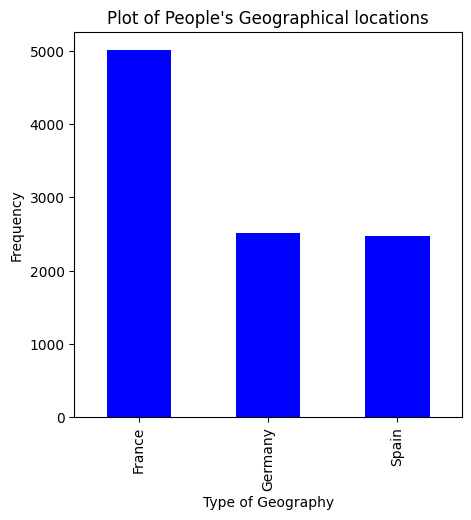

In [70]:
plt.figure(figsize=(5,5))
plt.xlabel('Type of Geography')
plt.ylabel('Frequency')
df['Geography'].value_counts().plot(kind='bar',colormap='winter')
countries = ['France', 'Germany', 'Spain']
labels=['France','Germany','Spain']
plt.xticks(range(len(countries)),labels)
plt.title('Plot of People\'s Geographical locations');

From the above plot it is clear that the dataset contains more people living in France, than both germany and spain. The number of people living in Germany and Spain are almost equal

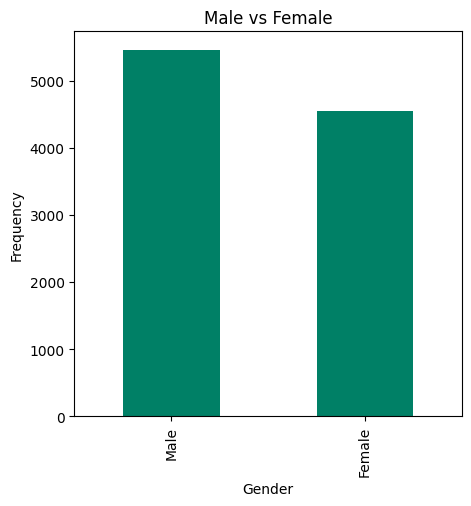

In [71]:
plt.figure(figsize=(5,5))
plt.xlabel('Gender')
plt.ylabel('Frequency')
df['Gender'].value_counts().plot(kind='bar',colormap='summer')
plt.xticks(range(0,2),['Male','Female'])
plt.title('Male vs Female');

From the above Plot, it is clear that Gender is balanced between male and female

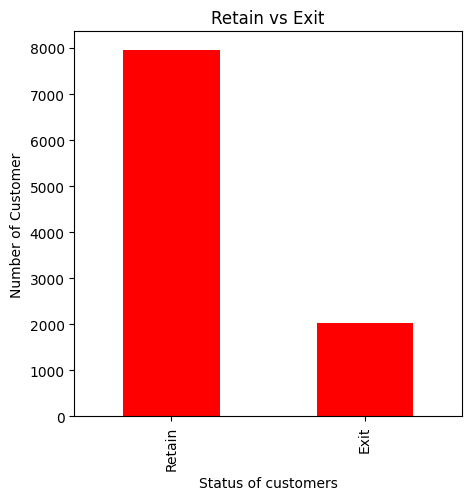

In [72]:
plt.figure(figsize=(5,5))
df['Exited'].value_counts().plot(kind='bar',colormap='autumn')
plt.title('Retain vs Exit')
plt.xlabel('Status of customers')
plt.ylabel('Number of Customer')
plt.xticks(range(0,2),['Retain','Exit']);

Fom the above plot it is clear that the data is highly imbalanced with the traget variable

**Correlation Heatmap**

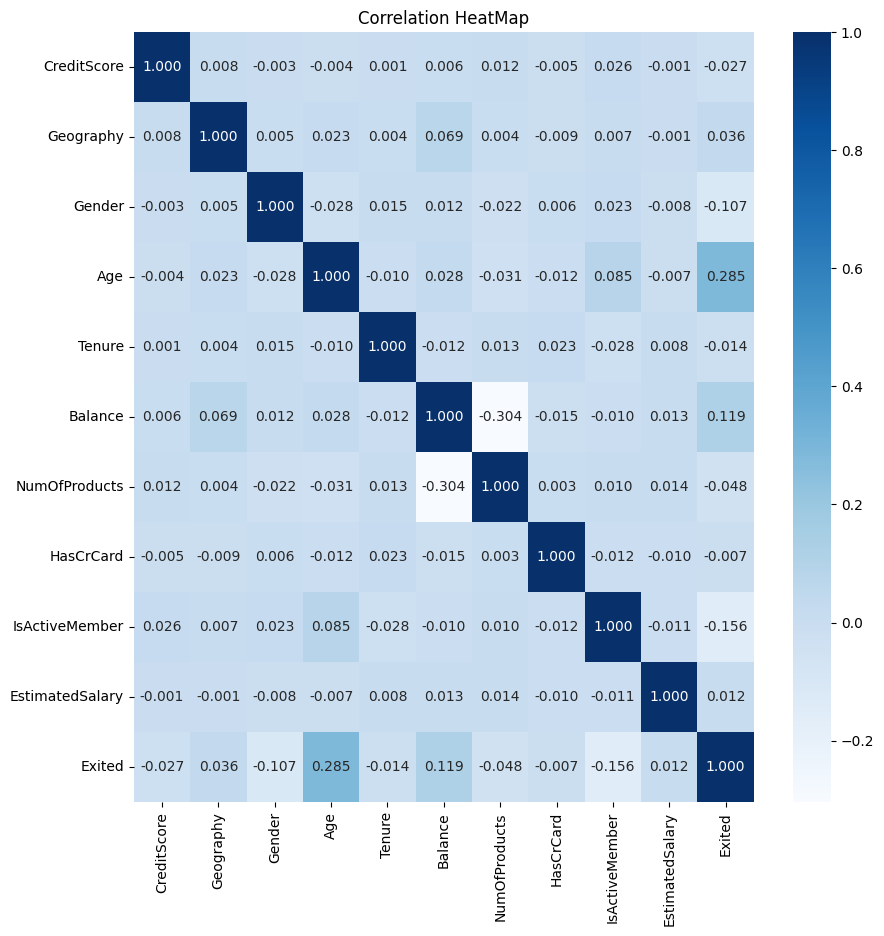

In [73]:
plt.figure(figsize=(10,10))
plt.title('Correlation HeatMap')
sns.heatmap(df.corr(),annot=True,fmt='.3f',cmap='Blues');

From the above plot we can infer three things:
* No. of Products and Balance are highly negatively correlated
* The exit status of a customer depends on the age and balance significantly
* Active status of the member is negatively correlated with the exit status of the customer

# **Balanacing the Data**

In [74]:
class_count_retain,class_count_exit = df.Exited.value_counts()
class_retain = df[df.Exited == 0]
class_exit = df[df.Exited == 1]
print("Class retain: ",class_retain.shape)
print("Class exit: ",class_exit.shape)

Class retain:  (7963, 11)
Class exit:  (2037, 11)


In [75]:
print("Age Statistics of Reatined Customers")
print(class_retain['Age'].describe())
print()
print("Age Statistics of Exited Customer")
print(class_exit['Age'].describe())

Age Statistics of Reatined Customers
count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

Age Statistics of Exited Customer
count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64


From the above statistics, it is clear that Customers who have exited are relatively old than the customers who have retained their accounts in the bank

In [76]:
print("Bank Balance Statistics of Reatined Customers")
print(class_retain['Balance'].describe())
print()
print("Bank Balance Statistics of Exited Customer")
print(class_exit['Balance'].describe())

Bank Balance Statistics of Reatined Customers
count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

Bank Balance Statistics of Exited Customer
count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64


From the above statistics, it is clear that the customers who have exited have higher mean balance than the customers who have retained their accounts in the bank

**SMOTE Balancing**

In [77]:
X = df.drop('Exited',axis=1)
y = df.Exited

In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X, y = sm.fit_resample(X,y)
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

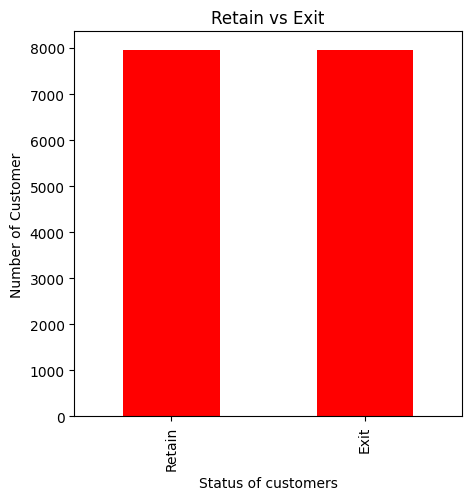

In [80]:
plt.figure(figsize=(5,5))
y.value_counts().plot(kind='bar',colormap='autumn')
plt.title('Retain vs Exit')
plt.xlabel('Status of customers')
plt.ylabel('Number of Customer')
plt.xticks(range(0,2),['Retain','Exit']);

From the above plot, it is clear that the data is balanced 

# **Modelling the Data**

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**Evaluation and model testing function**

In [83]:
def model_scores(models,X_train,X_test,y_train,y_test,X,y):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print('Model Score: ',model.score(X_test, y_test)*100)
    print('Cross-validation score: ',np.mean(cross_val_score(model,X,y,cv=5))*100)
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,5))
    plt.title('Confusion Matrix heatmap of '+str(model.__class__.__name__))
    sns.heatmap(cm,annot=True,fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

In [84]:
models = {'Random Forest':RandomForestClassifier(),
'Extra Tree':ExtraTreeClassifier(),'Support Vector':svm.SVC(),'Gaussain NB':GaussianNB(),
'SGD':SGDClassifier(),'AdaBoost':AdaBoostClassifier()}

**Testing Various Models**

Random Forest
Model Score:  86.56622724419336
Cross-validation score:  85.59014763373118

Extra Tree
Model Score:  79.22159447583176
Cross-validation score:  78.41312807898764

Support Vector
Model Score:  84.08662900188324
Cross-validation score:  83.30457328520282

Gaussain NB
Model Score:  80.50847457627118
Cross-validation score:  79.07278408973323

SGD
Model Score:  77.02448210922788
Cross-validation score:  75.93297205888005

AdaBoost
Model Score:  83.7727558066541
Cross-validation score:  82.50080168239974



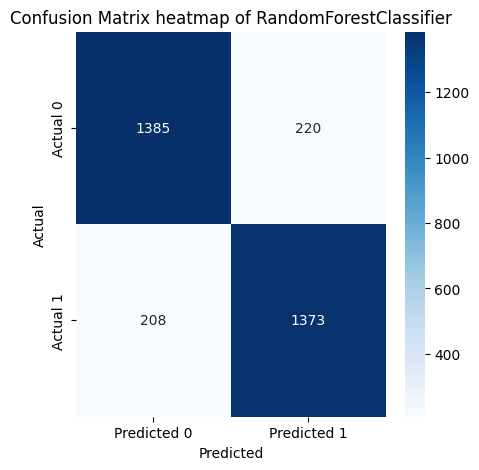

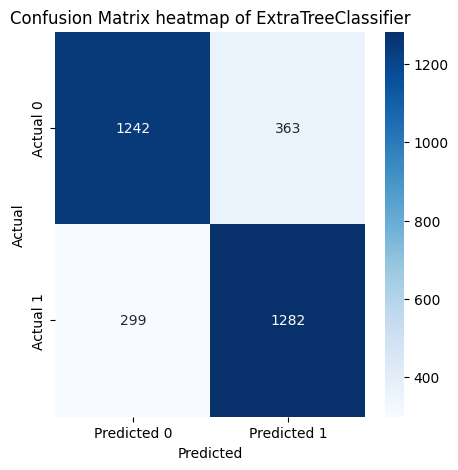

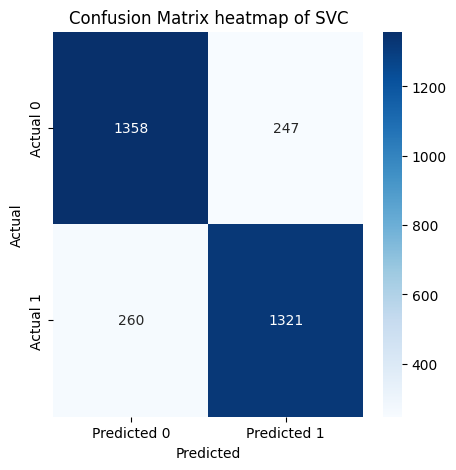

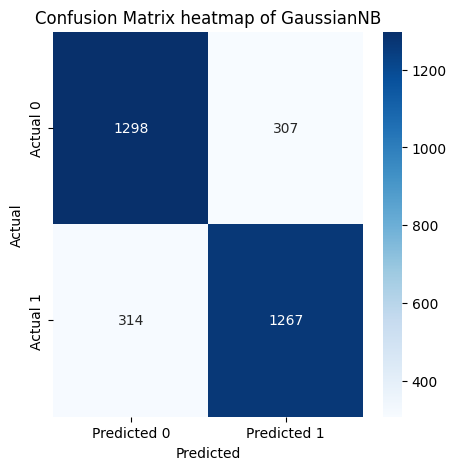

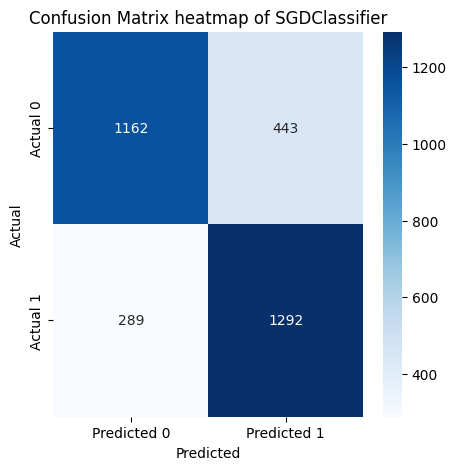

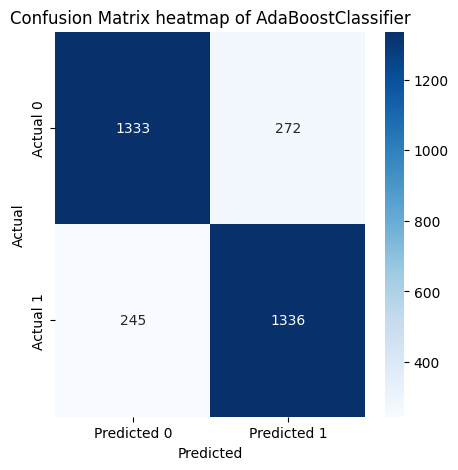

In [85]:
for name,model in models.items():
    print(name)
    model_scores(model,X_train,X_test,y_train,y_test,X,y)
    print()

# **Final Model**

In [86]:
final_model = RandomForestClassifier()
final_model.fit(X,y)

RandomForestClassifier()

In [87]:
import pickle
pickle.dump(final_model,open('bank_churn.pkl','wb'))